In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [88]:
sns.set(style='darkgrid', palette='deep' )

In [3]:
train = pd.read_csv('Titanic/Data/train.csv')
test = pd.read_csv('Titanic/Data/test.csv')

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
full = pd.concat([train, test], axis= 0, sort=False)

In [54]:
full.shape, train.shape, test.shape

((1309, 12), (891, 12), (418, 11))

In [55]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
LT = train.shape[0]
LT

891

In [57]:
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [58]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [59]:
full.isna().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

In [60]:
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

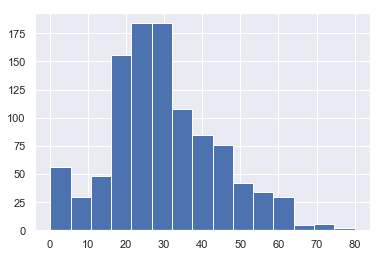

In [61]:
full.Age.hist(bins = 15)

In [62]:
full['Age'].fillna(full['Age'].median(), inplace = True)

In [63]:
full.drop('Cabin', axis=1, inplace=True)

In [64]:
full.Fare.fillna(full.Fare.median(), inplace = True)

In [65]:
full.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [66]:
full.Embarked.fillna('S', inplace = True)

In [67]:
full.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [68]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [69]:
full_dummies = pd.get_dummies(full, columns=['Pclass', 'Sex', 'Embarked'])

In [70]:
full_dummies.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,1,0,0,1
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,1,0,1,0,0
2,3,1.0,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0,0,0,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,1,0,0,0,1
4,5,0.0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,1,0,0,1


In [71]:
full_dummies.drop(columns=['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [72]:
full_dummies.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1.0,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1.0,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1.0,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0.0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [73]:
Train = full_dummies.iloc[:LT, :]

In [74]:
Test = full_dummies.iloc[LT:, :]

In [75]:
Train.shape, Test.shape

((891, 13), (418, 13))

In [78]:
Train.isnull().sum() 

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [79]:
Test.isnull().sum()

Survived      418
Age             0
SibSp           0
Parch           0
Fare            0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

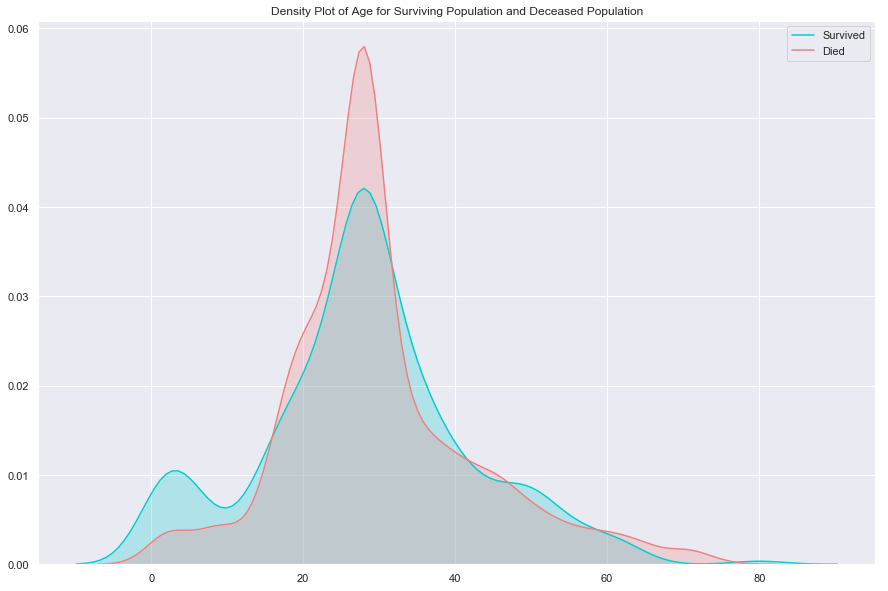

In [90]:
plt.figure(figsize=(15, 10))
sns.kdeplot(Train.Age [Train.Survived == 1], shade=True, color = 'darkturquoise')
sns.kdeplot(Train.Age [Train.Survived == 0], shade=True, color = 'lightcoral')
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

Text(0.5, 1.0, 'Density Plot of Fare for Surviving Population and Deceased Population')

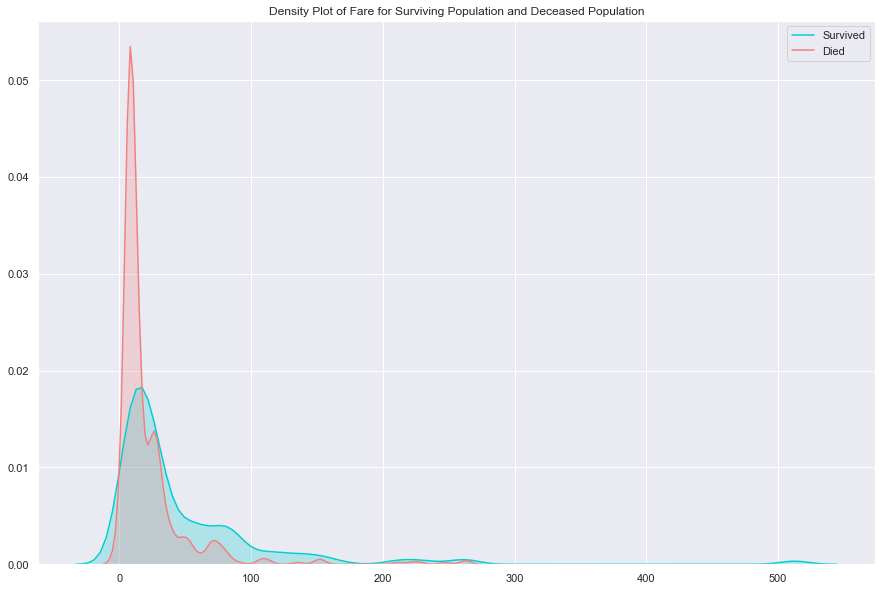

In [92]:
plt.figure(figsize=(15, 10))
sns.kdeplot(Train.Fare [Train.Survived == 1], shade=True, color='darkturquoise')
sns.kdeplot(train.Fare [Train.Survived == 0], shade=True, color='lightcoral')
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


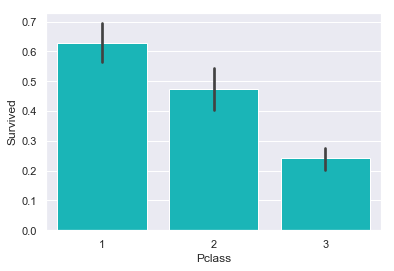

In [94]:
sns.barplot('Pclass', 'Survived', data=train, color = 'darkturquoise')
plt.show()

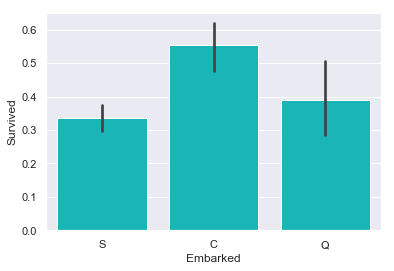

In [102]:
sns.barplot('Embarked', 'Survived', data=train, color = 'darkturquoise')
plt.show()

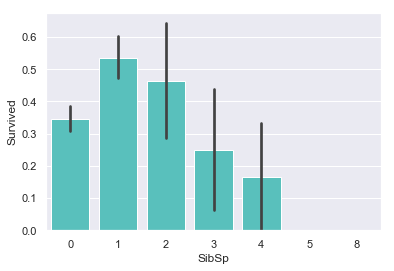

In [103]:
sns.barplot('SibSp', 'Survived', data=train, color='mediumturquoise')
plt.show()

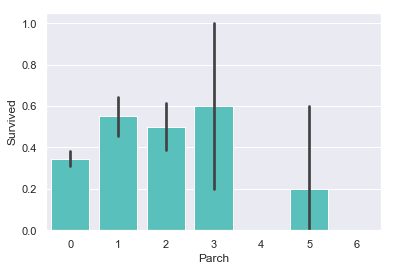

In [104]:
sns.barplot('Parch', 'Survived', data=train, color='mediumturquoise')
plt.show()

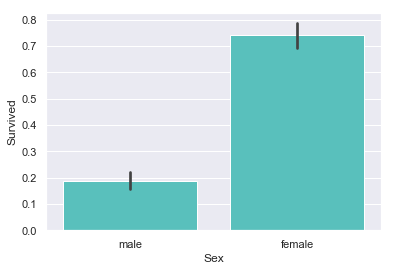

In [105]:
sns.barplot('Sex', 'Survived', data=train, color='mediumturquoise')
plt.show()

In [135]:
train_x1 = Train.iloc[:, 1:]
train_y1 = Train.iloc[:, 0:1]
test_x1 = Test.iloc[:, 1:]
test_y1 = pd.DataFrame()

In [130]:
train_x1.shape, train_y1.shape, test_x1.shape

((891, 12), (891, 1), (418, 12))

In [131]:
logreg = LogisticRegression()
logreg.fit(train_x1, train_y1)
logreg.score(train_x1, train_y1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8058361391694725

In [132]:
pred_y1= logreg.predict(test_x1)

In [133]:
logreg.score(test_x1, pred_y1)

1.0

In [138]:
test_y1['Survived'] = pred_y1
test_y1.head()

,Survived
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


In [162]:
train, test = train_test_split(Train, test_size=0.2)

In [163]:
columns=["Age", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male"] 
train_x2=train[columns]
train_y2=train['Survived']
test_x2 = test[columns]
test_y2 = test['Survived']

In [164]:
logreg = LogisticRegression()
logreg.fit(train_x2, train_y2)
logreg.score(train_x2, train_y2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7921348314606742

In [165]:
pred_y2 = logreg.predict(test_x2)
logreg.score(test_x2, test_y2)

0.8044692737430168

In [185]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x1, train_y1)
random_forest.score(train_x1, train_y1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9797979797979798

In [205]:
#import graphviz 
#tree1_view = tree.export_graphviz(tree1, out_file=None, feature_names = X_DT.columns.values, rotate=True) 
#tree1viz = graphviz.Source(tree1_view)
#tree1viz

In [179]:
pred_y_final = random_forest.predict(test_x1)
pred_y_final = pd.DataFrame(pred_y_final)
pred_y_final.shape

(418, 1)

In [199]:
passenger_id = full.iloc[LT:, 0:1]
final1 = pd.concat([passenger_id, pred_y_final], axis=1)

In [200]:
final1.to_csv('TitanicRF.csv', index=False)

In [201]:
tree1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=3, min_samples_leaf=20)
tree1.fit(train_x1, train_y1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [202]:
Y_pred_DT = tree1.predict(test_x1)
Y_pred_DT = pd.DataFrame(Y_pred_DT)

In [203]:
final2 = pd.concat([passenger_id, Y_pred_DT])

In [204]:
final2.to_csv('TitanicDT.csv', index=False)